In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
from PIL import Image

In [14]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [16]:
x_train = x_train/255
x_test = x_test/255

In [20]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
x_train_s, x_val, y_train_s, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

In [24]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10,activation= "softmax")
])


In [26]:
model.compile(
    optimizer="adam",
    loss = "sparse_categorical_crossentropy",
    metrics="accuracy"
)

In [28]:
history = model.fit(x_train_s,y_train_s,epochs=5,validation_data = (x_val,y_val))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1392 - accuracy: 0.9584 - val_loss: 0.0614 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0324 - val_accuracy: 0.9891
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0332 - accuracy: 0.9902 - val_loss: 0.0379 - val_accuracy: 0.9883
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0252 - accuracy: 0.9922 - val_loss: 0.0324 - val_accuracy: 0.9901
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0360 - val_accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0406 - val_accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.0312 - val_ac

In [30]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"Test accuracy : {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0351 - accuracy: 0.9902
Test accuracy : 0.9901999831199646


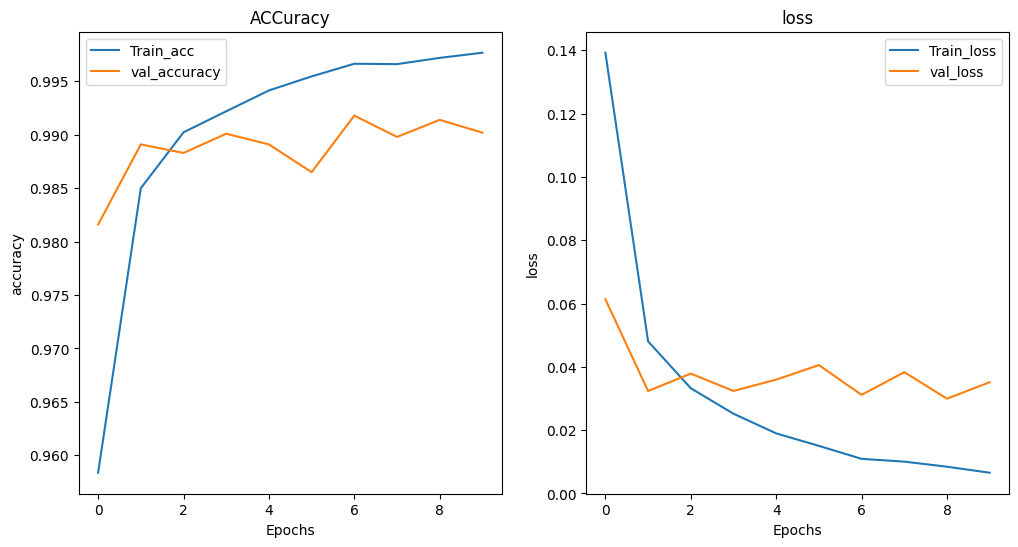

In [42]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label= "Train_acc")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.title("ACCuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history["loss"],label= "Train_loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.title("loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

1/1 [==============================] - 0s 19ms/step


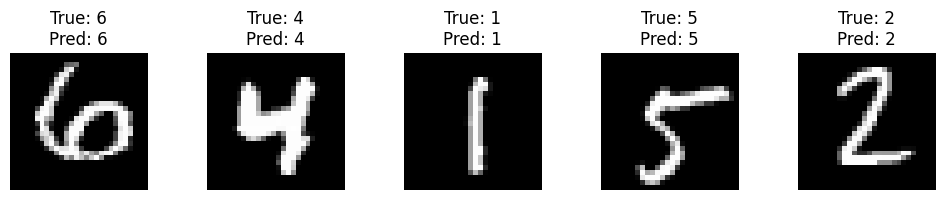

In [56]:
# Pick 5 random test images
indices = np.random.choice(len(x_test), 5, replace=False)

# Predict and plot
plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices):
    img = x_test[idx]
    true_label = y_test[idx]
    
    # Predict and plot
    prediction = model.predict(img.reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Install PyTorch using pip inside Jupyter Notebook
!pip install torch torchvision torchaudio


100%|██████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [01:25<00:00, 116kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:02<00:00, 10.1kB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:08<00:00, 186kB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 822kB/s]


Epoch 1 done
Epoch 2 done
Epoch 3 done
Epoch 4 done
Epoch 5 done
Test Accuracy: 99.10%


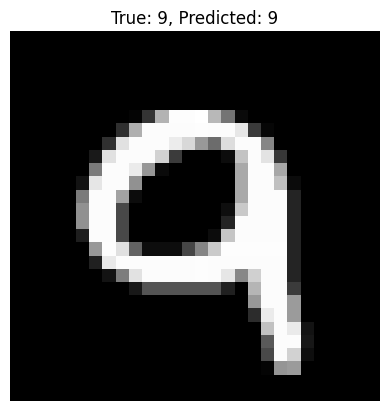

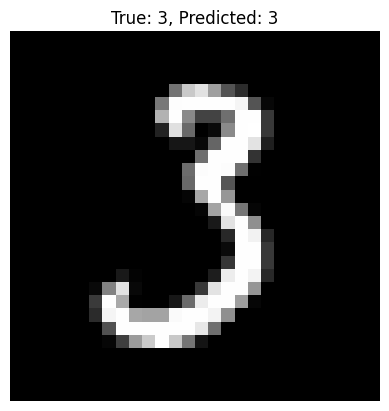

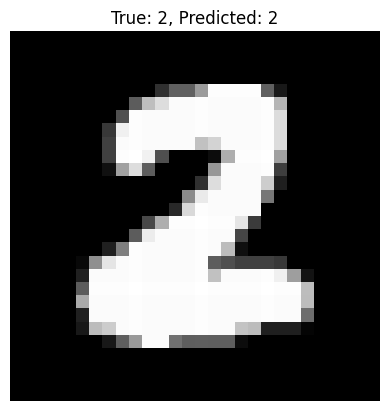

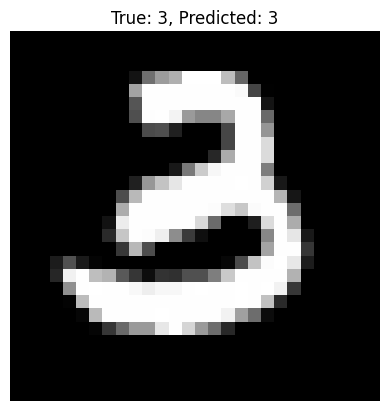

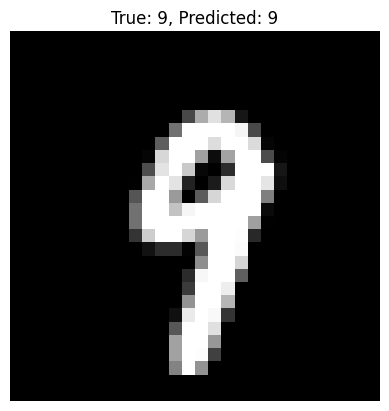

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load MNIST data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_ds = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_ds  = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds, batch_size=1000, shuffle=False)

# Define a simple CNN
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1   = nn.Linear(64 * 12 * 12, 128)
        self.fc2   = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

# Initialize model, optimizer, and loss function
model = SimpleCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.NLLLoss()

# Train the model
for epoch in range(5):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} done")

# Evaluate the model
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

# Show 5 random test images with predictions
indices = np.random.choice(len(test_ds), 5, replace=False)
for idx in indices:
    img, label = test_ds[idx]
    img_input = img.unsqueeze(0).to(device)
    model.eval()
    with torch.no_grad():
        pred = model(img_input).argmax(dim=1).item()

    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {label}, Predicted: {pred}")
    plt.axis('off')
    plt.show()
